In [1]:
import pandas as pd
import plotly.graph_objs as go

In [6]:
# read in the data

df = pd.read_csv('../assets/flags.csv')
df.shape

(194, 30)

In [7]:
# each row is a country
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [8]:
# missing data?
df.isnull().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colors        0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

In [10]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns

['name',
 'landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colors',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'mainhue',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

In [14]:
list_of_columns=list(['population', 'language', 'religion', 'bars', 'stripes', 'colors'])
list_of_columns

['population', 'language', 'religion', 'bars', 'stripes', 'colors']

In [12]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
go.Format
go.Figure


plotly.graph_objs._choropleth.Choropleth

In [13]:
data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = df['corn'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
                        'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
                        'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
                        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
                        'WI', 'WY'], dtype=object),
    'z': array([  34.9,    0. ,    7.3,   69.5,   34.6,  183.2,    0. ,   26.9,    3.5,
                  57.8,    0. ,   24. , 2228.5, 1123.2, 2529.8,  457.3,  179.1,   91.4,
                   0. ,   54.1,    0. ,  381.5, 1264.3,  110. ,  428.8,    5.4, 1735.9,
                   0. ,    0. ,   10.1,   11.2,  106.1,   92.2,  236.1,  535.1,   27.5,
                  11.7,  112.1,    0. ,   32.1,  643.6,   8

In [15]:
data=go.Choropleth(
    locations=df['name'], # Spatial coordinates
    locationmode = 'country names', # set of locations match entries in `locations`
    z = df['population'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'country names',
    'locations': array(['Afghanistan', 'Albania', 'Algeria', 'American-Samoa', 'Andorra',
                        'Angola', 'Anguilla', 'Antigua-Barbuda', 'Argentina', 'Argentine',
                        'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
                        'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
                        'Botswana', 'Brazil', 'British-Virgin-Isles', 'Brunei', 'Bulgaria',
                        'Burkina', 'Burma', 'Burundi', 'Cameroon', 'Canada',
                        'Cape-Verde-Islands', 'Cayman-Islands', 'Central-African-Republic',
                        'Chad', 'Chile', 'China', 'Colombia', 'Comorro-Islands', 'Congo',
                        'Cook-Islands', 'Costa-Rica', 'Cuba', 'Cyprus', 'Czechoslovakia',
                        'Denmark', 'Djib

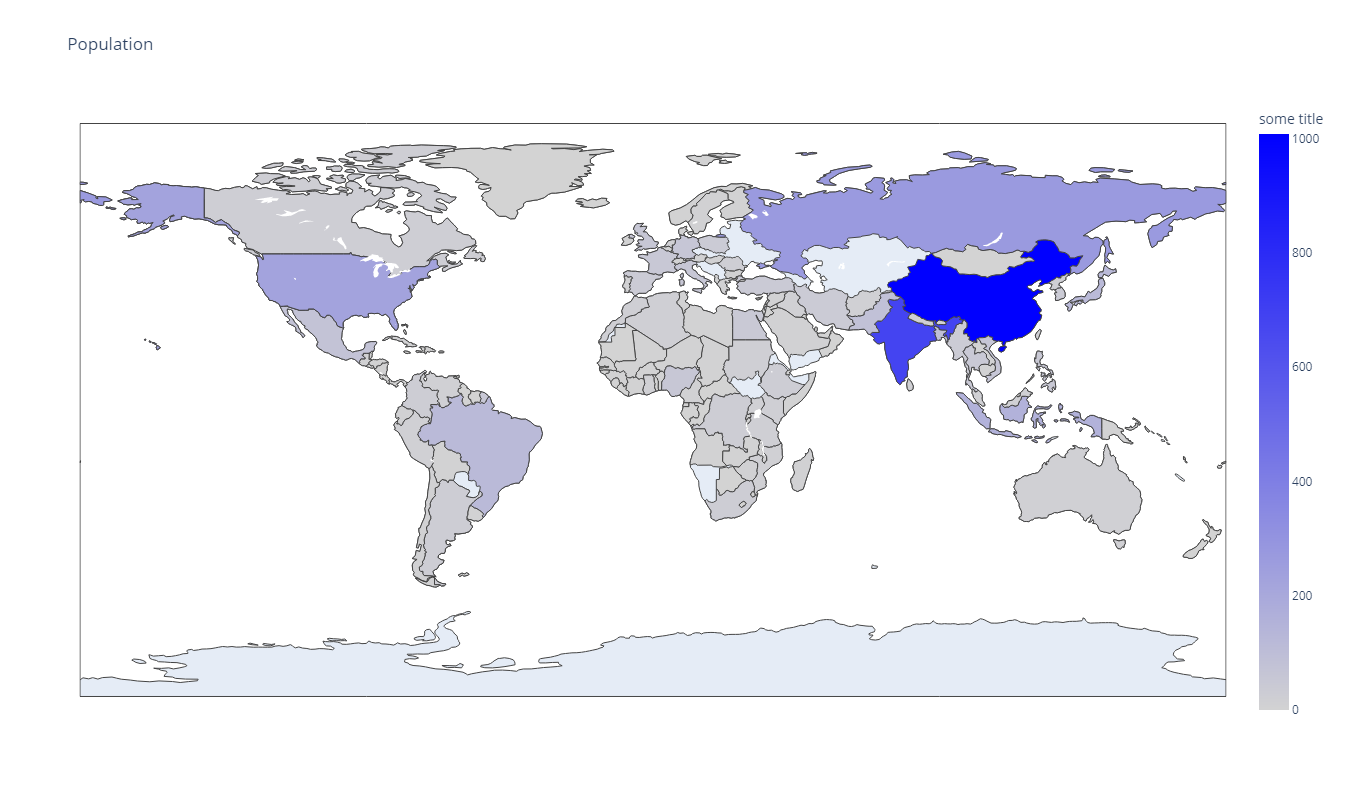

In [18]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'Population',
        geo_scope='world',
        width=1200,
        height=800
    )
fig.write_html('iowa-corn.html')
fig

In [20]:
# make a function that can intake any varname and produce a map.
def make_figure(varname):
    myheading1 = f"Wow! That's a lot of {varname}!"
    mygraphtitle = f'{varname} by country'
    mycolorscale = 'ylorrd' # Note: The error message will list possible color scales.
    mycolorbartitle = "Count"

    data=go.Choropleth(
        locations=df['name'], # Spatial coordinates
        locationmode = 'country names', # set of locations match entries in `locations`
        z = df[varname].astype(float), # Data to be color-coded
        colorscale = mycolorscale,
        colorbar_title = mycolorbartitle,
    )


    fig = go.Figure(data)
    fig.update_layout(
        title_text = mygraphtitle,
        geo_scope='world',
        width=1200,
        height=800
    )
    return fig

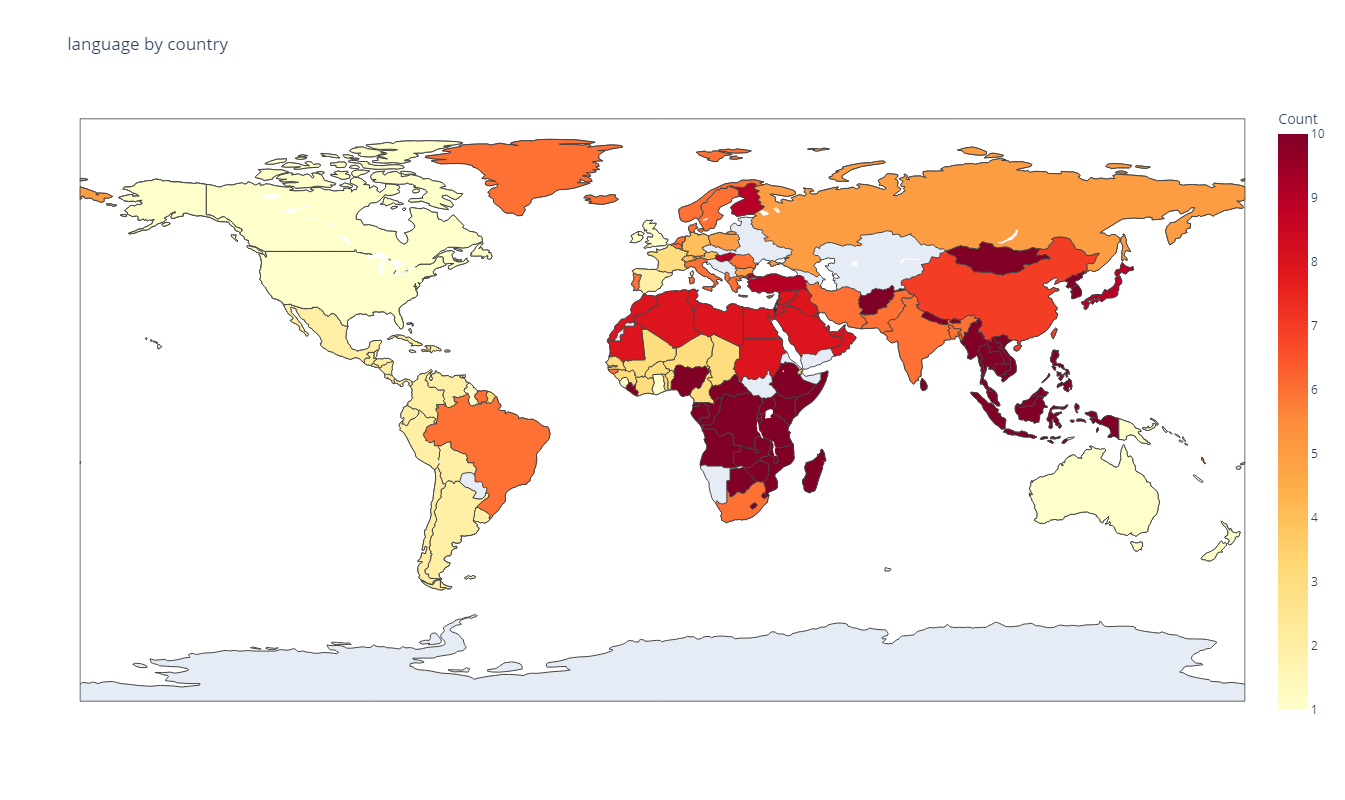

In [21]:
fig=make_figure('language')
fig